# Statement 5 
## Train a DNN on the Forest Fire dataset using RMSprop optimizer with a learning rate of 0.01. Report 
## training and validation accuracy

In [10]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, roc_auc_score)

Found 1467 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Found 68 images belonging to 2 classes.
Class indices: {'fire': 0, 'nofire': 1}
Training samples: 1467
Validation samples: 365
Test samples: 68


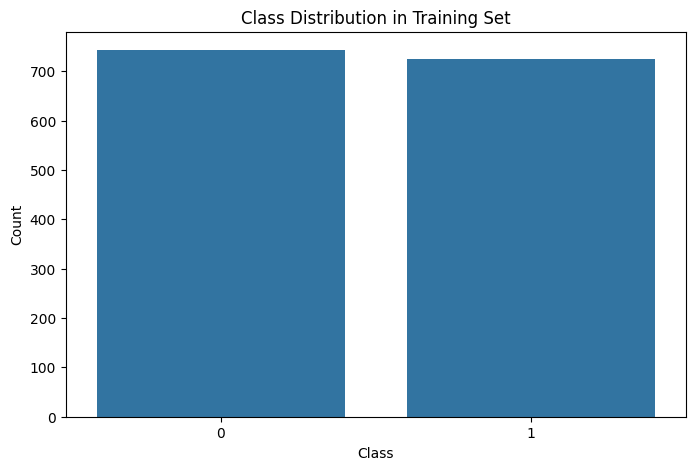

In [2]:
# 1. Data Loading and EDA
train_dir = 'DL_LAB_EXAM/Datasets/forest_fire/Training and Validation'
test_dir = 'DL_LAB_EXAM/Datasets/forest_fire/Testing'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# EDA
print("Class indices:", train_generator.class_indices)
print("Training samples:", train_generator.samples)
print("Validation samples:", val_generator.samples)
print("Test samples:", test_generator.samples)

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=train_generator.classes)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [4]:
# 2. Model Building and Training - Adam
model_adam = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_adam.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_adam = model_adam.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=15
)

Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 309ms/step - accuracy: 0.6428 - loss: 11.3919 - val_accuracy: 0.8239 - val_loss: 2.1722
Epoch 2/15
 1/45 ━━━━━━━━━━━━━━━━━━━━ 12s 292ms/step - accuracy: 0.8438 - loss: 1.9265

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8438 - loss: 1.9265 - val_accuracy: 0.8239 - val_loss: 2.5713
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 292ms/step - accuracy: 0.8241 - loss: 2.8241 - val_accuracy: 0.8324 - val_loss: 1.0372
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6562 - loss: 2.0748 - val_accuracy: 0.8438 - val_loss: 0.9202
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 297ms/step - accuracy: 0.8438 - loss: 1.1684 - val_accuracy: 0.8523 - val_loss: 0.4443
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8438 - loss: 0.4606 - val_accuracy: 0.8352 - val_loss: 0.4637
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 296ms/step - accuracy: 0.8771 - loss: 0.4295 - val_accuracy: 0.8665 - val_loss: 0.4729
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9062 - loss: 0.1764 - val_accuracy: 0.8580 - val_loss: 0.4943
Epoch 9/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 298ms/step - accuracy: 0.8803 - loss: 0.2520 - val_accuracy: 0.8580 - val_

In [7]:
# 3. Model Building and Training - SGD
model_sgd = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_sgd.compile(
    optimizer=SGD(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_sgd = model_sgd.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=15
)

Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 326ms/step - accuracy: 0.7130 - loss: 0.5611 - val_accuracy: 0.7926 - val_loss: 0.4228
Epoch 2/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8750 - loss: 0.2786 - val_accuracy: 0.7983 - val_loss: 0.4093
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 288ms/step - accuracy: 0.8586 - loss: 0.3604 - val_accuracy: 0.8409 - val_loss: 0.3953
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8125 - loss: 0.3004 - val_accuracy: 0.8438 - val_loss: 0.3911
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 286ms/step - accuracy: 0.9086 - loss: 0.2625 - val_accuracy: 0.8494 - val_loss: 0.3605
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8750 - loss: 0.3246 - val_accuracy: 0.8523 - val_loss: 0.3690
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 280ms/step - accuracy: 0.8814 - loss: 0.2837 - val_accuracy: 0.8608 - val_loss: 0.3655
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8750 - loss: 0.2588 - val_accuracy: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step 


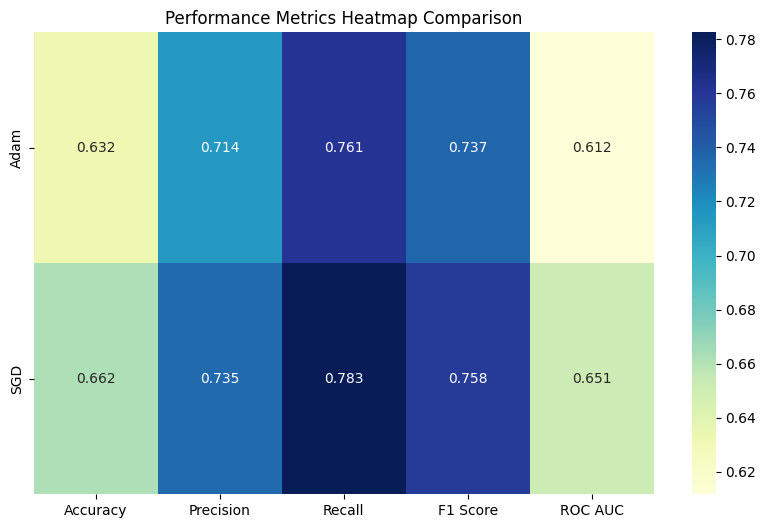

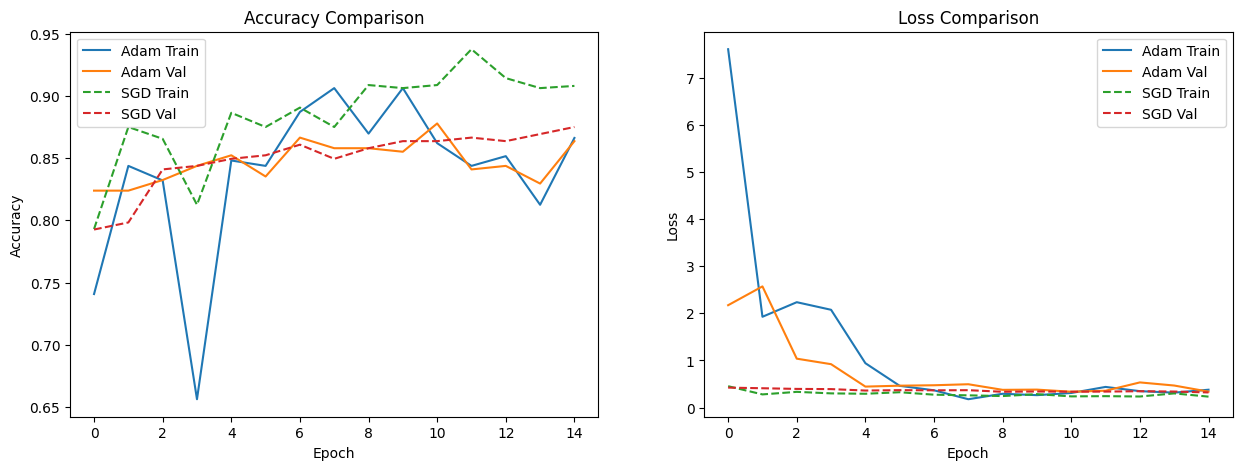

<Figure size 1000x600 with 0 Axes>

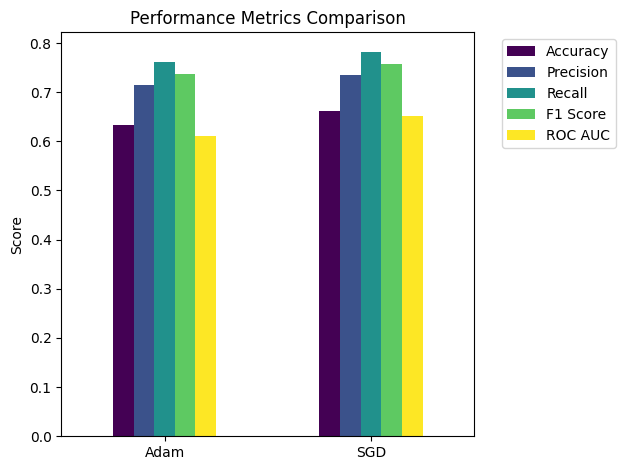


Final Performance Comparison:
      Accuracy  Precision    Recall  F1 Score   ROC AUC
Adam  0.632353   0.714286  0.760870  0.736842  0.611660
SGD   0.661765   0.734694  0.782609  0.757895  0.651186


In [11]:
# 5. Evaluation and Comparison
def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred_probs = model.predict(generator).ravel()
    y_pred = (y_pred_probs > 0.5).astype(int)
    
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred_probs)
    }

# Evaluate both models
adam_metrics = evaluate_model(model_adam, test_generator)
sgd_metrics = evaluate_model(model_sgd, test_generator)

# Create metrics DataFrame with numeric values only
metrics_df = pd.DataFrame({
    'Adam': adam_metrics,
    'SGD': sgd_metrics
}).T

# Ensure all values are numeric
metrics_df = metrics_df.apply(pd.to_numeric)

# Metrics Comparison Heatmap (fixed)
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Performance Metrics Heatmap Comparison')
plt.show()

# Additional visualizations
plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Adam Train')
plt.plot(history_adam.history['val_accuracy'], label='Adam Val')
plt.plot(history_sgd.history['accuracy'], '--', label='SGD Train')
plt.plot(history_sgd.history['val_accuracy'], '--', label='SGD Val')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Adam Train')
plt.plot(history_adam.history['val_loss'], label='Adam Val')
plt.plot(history_sgd.history['loss'], '--', label='SGD Train')
plt.plot(history_sgd.history['val_loss'], '--', label='SGD Val')
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Metrics Comparison Bar Plot
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis')
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print final comparison table
print("\nFinal Performance Comparison:")
print(metrics_df)